In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
mnist = fetch_openml("mnist_784", version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
x_train ,x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
sgd_clf = SGDClassifier(random_state=3)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=3)

In [25]:
# cross_val_score(sgd_clf, x_train, y_train_5, cv=3)
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [27]:
confusion_matrix(y_train_5, y_train_pred)

array([[54029,   550],
       [ 1470,  3951]], dtype=int64)

In [30]:
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.7288323187603764

In [32]:
y_score = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")

In [38]:
fpr, tpr, threshold = roc_curve(y_train_5, y_train_pred)

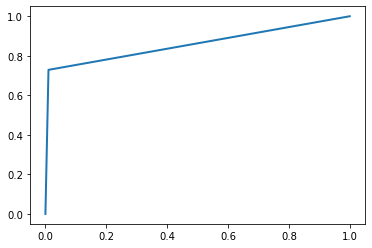

In [41]:
plt.plot(fpr, tpr, linewidth=2)

In [44]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [4]:
sgd_clf = SGDClassifier(random_state=3)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=3)

In [5]:
y_train_pred = cross_val_predict(sgd_clf, x_train,y_train, cv=3)
conf_mtr = confusion_matrix(y_train, y_train_pred)

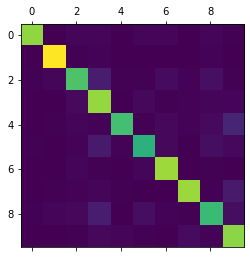

In [7]:
plt.matshow(conf_mtr)
plt.show()

In [11]:
row_sum = conf_mtr.sum(axis=1, keepdims=True)
conf_mtr_i = conf_mtr/row_sum
np.fill_diagonal(conf_mtr_i, 0)

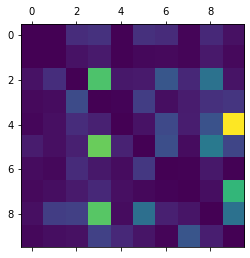

In [13]:
plt.matshow(conf_mtr_i)
plt.show()